In [508]:
import pandas as pd
import numpy as np
from darts import TimeSeries
import calendar
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta, LinearRegressionModel
from darts.metrics import mae, mape
from darts.utils.statistics import extract_trend_and_seasonality
from darts.utils.utils import ModelMode
from darts.utils.utils import SeasonalityMode
import plotly.express as px

In [74]:
data = pd.read_csv('../clean_data/clean_sheff_data.csv')

In [42]:
# def calc_GDD(row):
#     MaxTemp = row['tmax(degC)']
#     MinTemp = row['tmin(degC)']
#     if row['mm'] >= 4 and row['mm'] <=10:
#         GDD_raw = ((MaxTemp + MinTemp)-10)
#         if GDD_raw <= 0:
#             GDD_raw = 0
#     else:
#         GDD_raw = 0
#     GDD = GDD_raw*15
#     return GDD

In [75]:
def calc_GDD(data):
    if data['mm'] >= 4 and data['mm'] <=10:
        GDD_raw = (data['avgtemp(degC)']-10)
        if GDD_raw <= 0:
            GDD_raw = 0
    
    else:
        GDD_raw = 0
    GDD = GDD_raw*30
    return GDD
    

In [76]:
data['GDD'] = data.apply(calc_GDD, axis = 1)

In [380]:
data.head(10)

Unnamed: 0  yyyy   mm  tmax(degC)  tmin(degC)  af(days)  rain(mm)  \
0         552  1929  Jan         3.8         0.3      12.0      40.5   
1         553  1929  Feb         2.6        -2.5      17.0      17.1   
2         554  1929  Mar        12.1         2.4       6.0       3.3   
3         555  1929  Apr        10.1         2.9       3.0      25.9   
4         556  1929  May        15.9         6.7       0.0      52.1   
5         557  1929  Jun        17.3         9.3       0.0      38.0   
6         558  1929  Jul        20.9        11.9       0.0      25.3   
7         559  1929  Aug        19.1        11.2       0.0      47.7   
8         560  1929  Sep        20.1        10.9       0.0      37.3   
9         561  1929  Oct        12.7         6.4       0.0      85.9   

   sun(hours)  avgtemp(degC)    GDD    period  
0        23.7           2.05    0.0  1929-Jan  
1        16.9           0.05    0.0  1929-Feb  
2        16.9           7.25    0.0  1929-Mar  
3       108.0           6.50    0.0  1929-Apr  
4       188.3          11.30   39.0  1929-May  
5       192.0          13.30   99.0  1929-Jun  
6       193.8          16.40  192.0  1929-Jul  
7       154.2          15.15  154.5  1929-Aug  
8       178.9          15.50  165.0  1929-Sep  
9       106.8           9.55    0.0  1929-Oct

In [78]:
data['mm'] = data['mm'].apply(lambda x: calendar.month_abbr[x])

In [79]:
data['yyyy'] = data['yyyy'].astype(str)

In [80]:
data['period'] = data[['yyyy', 'mm']].agg('-'.join, axis=1)

In [238]:
data.tail(20)

Unnamed: 0  yyyy   mm  tmax(degC)  tmin(degC)  af(days)  rain(mm)  \
1106        1658  2021  Mar        11.1         4.4       2.0      68.2   
1107        1659  2021  Apr        11.5         1.9       8.0       5.6   
1108        1660  2021  May        14.9         6.2       0.0     130.2   
1109        1661  2021  Jun        20.6        11.6       0.0      21.6   
1110        1662  2021  Jul        22.8        14.1       0.0      69.4   
1111        1663  2021  Aug        19.8        13.0       0.0      30.8   
1112        1664  2021  Sep        20.2        12.6       0.0      46.4   
1113        1665  2021  Oct        14.9         9.2       0.0      83.0   
1114        1666  2021  Nov        10.4         5.7       2.0      52.0   
1115        1667  2021  Dec         8.1         3.5       3.0     102.4   
1116        1668  2022  Jan         8.0         2.6       3.0      25.8   
1117        1669  2022  Feb         9.6         3.5       1.0     182.6   
1118        1670  2022  Mar        11.9         3.7       3.0      46.4   
1119        1671  2022  Apr        13.7         5.1       2.0      27.6   
1120        1672  2022  May        17.8         9.6       0.0      28.4   
1121        1673  2022  Jun        20.4        10.8       0.0      55.0   
1122        1674  2022  Jul        23.3        14.5       0.0      23.0   
1123        1675  2022  Aug        23.9        13.6       0.0      56.4   
1124        1676  2022  Sep        18.4        11.1       0.0      50.0   
1125        1677  2022  Oct        15.6         9.6       0.0     124.0   

      sun(hours)  avgtemp(degC)    GDD    period  
1106        94.5           7.75    0.0  2021-Mar  
1107       196.8           6.70    0.0  2021-Apr  
1108       125.9          10.55   16.5  2021-May  
1109       173.6          16.10  183.0  2021-Jun  
1110       171.0          18.45  253.5  2021-Jul  
1111        99.2          16.40  192.0  2021-Aug  
1112       129.6          16.40  192.0  2021-Sep  
1113        99.1          12.05   61.5  2021-Oct  
1114        53.3           8.05    0.0  2021-Nov  
1115        31.5           5.80    0.0  2021-Dec  
1116        85.7           5.30    0.0  2022-Jan  
1117        80.4           6.55    0.0  2022-Feb  
1118       150.0           7.80    0.0  2022-Mar  
1119       163.0           9.40    0.0  2022-Apr  
1120       138.3          13.70  111.0  2022-May  
1121        31.7          15.60  168.0  2022-Jun  
1122       190.6          18.90  267.0  2022-Jul  
1123       233.4          18.75  262.5  2022-Aug  
1124       122.2          14.75  142.5  2022-Sep  
1125       109.9          12.60   78.0  2022-Oct

In [82]:
series = TimeSeries.from_dataframe(data, "period", "avgtemp(degC)")
train, val = series[:-36], series[-36:]
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(1200, num_samples=1000)

In [83]:
import matplotlib.pyplot as plt


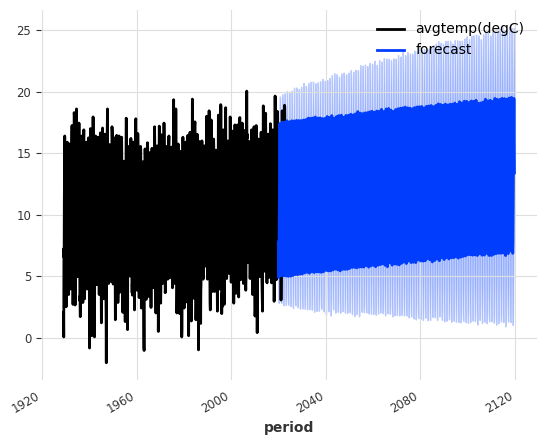

In [84]:
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [87]:
prediction[1100].mean()

<TimeSeries (DataArray) (period: 1, component: 1, sample: 1)>
array([[[19.37495011]]])
Coordinates:
  * period     (period) datetime64[ns] 2111-07-01
  * component  (component) object 'avgtemp(degC)'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [513]:
df_agg = data.groupby(by ='yyyy', as_index = False).agg({'GDD': 'sum', 
                                                        'avgtemp(degC)': 'mean',
                                                        'sun(hours)': 'mean',
                                                        'rain(mm)': 'sum',
                                                        'af(days)': 'sum',
                                                        'tmin(degC)': 'mean',
                                                        'tmax(degC)': 'mean'}
                                                       
                                                       )

In [514]:
df_agg

yyyy     GDD  avgtemp(degC)  sun(hours)  rain(mm)  af(days)  tmin(degC)  \
0   1929   649.5       9.095833  107.750000     712.5      44.0    5.541667   
1   1930   613.5       9.312500  101.258333     919.2      38.0    6.141667   
2   1931   520.5       9.029167   94.858333     927.9      44.0    5.883333   
3   1932   609.0       9.433333   88.350000     809.4      29.0    6.341667   
4   1933   889.5      10.175000  114.033333     633.8      33.0    6.708333   
..   ...     ...            ...         ...       ...       ...         ...   
89  2018   985.5      10.808333  125.591667     798.2      24.0    7.225000   
90  2019   811.5      10.641667  117.641667    1106.6      19.0    7.150000   
91  2020   807.0      10.795833  116.133333     912.2      13.0    7.216667   
92  2021   898.5      10.500000  106.908333     839.6      36.0    7.083333   
93  2022  1029.0      12.335000  130.520000     619.2       9.0    8.410000   

    tmax(degC)  
0    12.650000  
1    12.483333  
2    12.175000  
3    12.525000  
4    13.641667  
..         ...  
89   14.391667  
90   14.133333  
91   14.375000  
92   13.916667  
93   16.260000  

[94 rows x 8 columns]

In [515]:
series_avg_ann = TimeSeries.from_dataframe(df_agg, "yyyy", "avgtemp(degC)")
train_avg_ann, val_avg_ann = series_avg_ann[:-1], series_avg_ann[-1:]
model_avg_ann = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=SeasonalityMode.NONE)
model_avg_ann.fit(train_avg_ann)
prediction_avg_ann = model_avg_ann.predict(200, num_samples=1000)

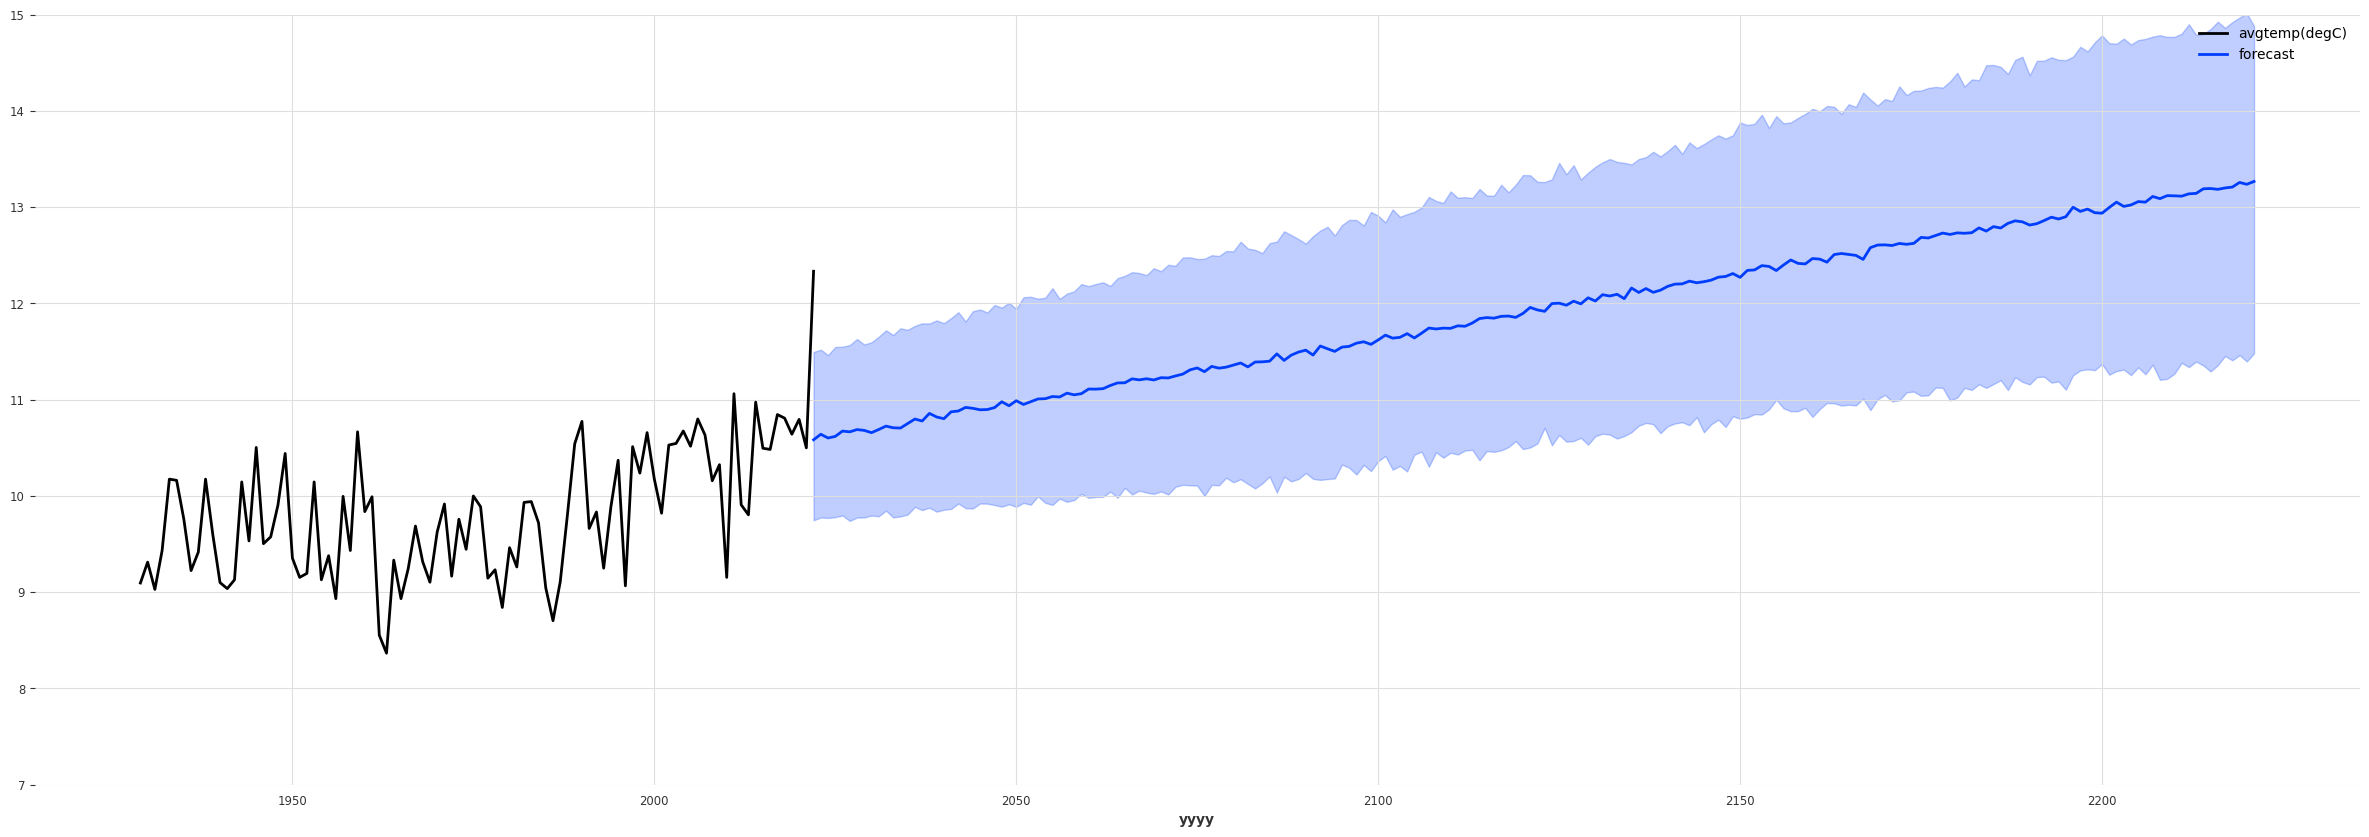

In [518]:
series_avg_ann.plot()
prediction_avg_ann.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylim(7, 15)
plt.rcParams['figure.figsize'] = (30,10)

In [519]:
avg_list = []
[avg_list.append(prediction_avg_ann[i].mean()[0].first_value()) for i in range(0,200)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [520]:
avg_list

[10.59039845096986,
 10.631518948465567,
 10.61094694950593,
 10.637537362968537,
 10.674214042245236,
 10.66399129765142,
 10.693885314997805,
 10.683442366431663,
 10.683067917182308,
 10.706979397194003,
 10.759653279441086,
 10.718320591164373,
 10.739153287941125,
 10.77720868899143,
 10.805581246112451,
 10.802192447723224,
 10.858736580646902,
 10.812980683398616,
 10.823243220090248,
 10.879068549945936,
 10.8845571522265,
 10.894984317481795,
 10.893544324140374,
 10.902842699487428,
 10.915969924696743,
 10.930724790840895,
 10.945935590289636,
 10.952156755449943,
 10.96018577883845,
 10.965389444864782,
 10.985628704611594,
 11.021403274250872,
 11.01130295942001,
 11.022387999945385,
 11.033611174620598,
 11.04759619383442,
 11.056747131056731,
 11.086449312597201,
 11.104003734516999,
 11.118884122850213,
 11.126547577315113,
 11.133245407756977,
 11.143044524261091,
 11.176722728959954,
 11.199908762007585,
 11.192858673412168,
 11.19308787386631,
 11.199256548655518,
 1

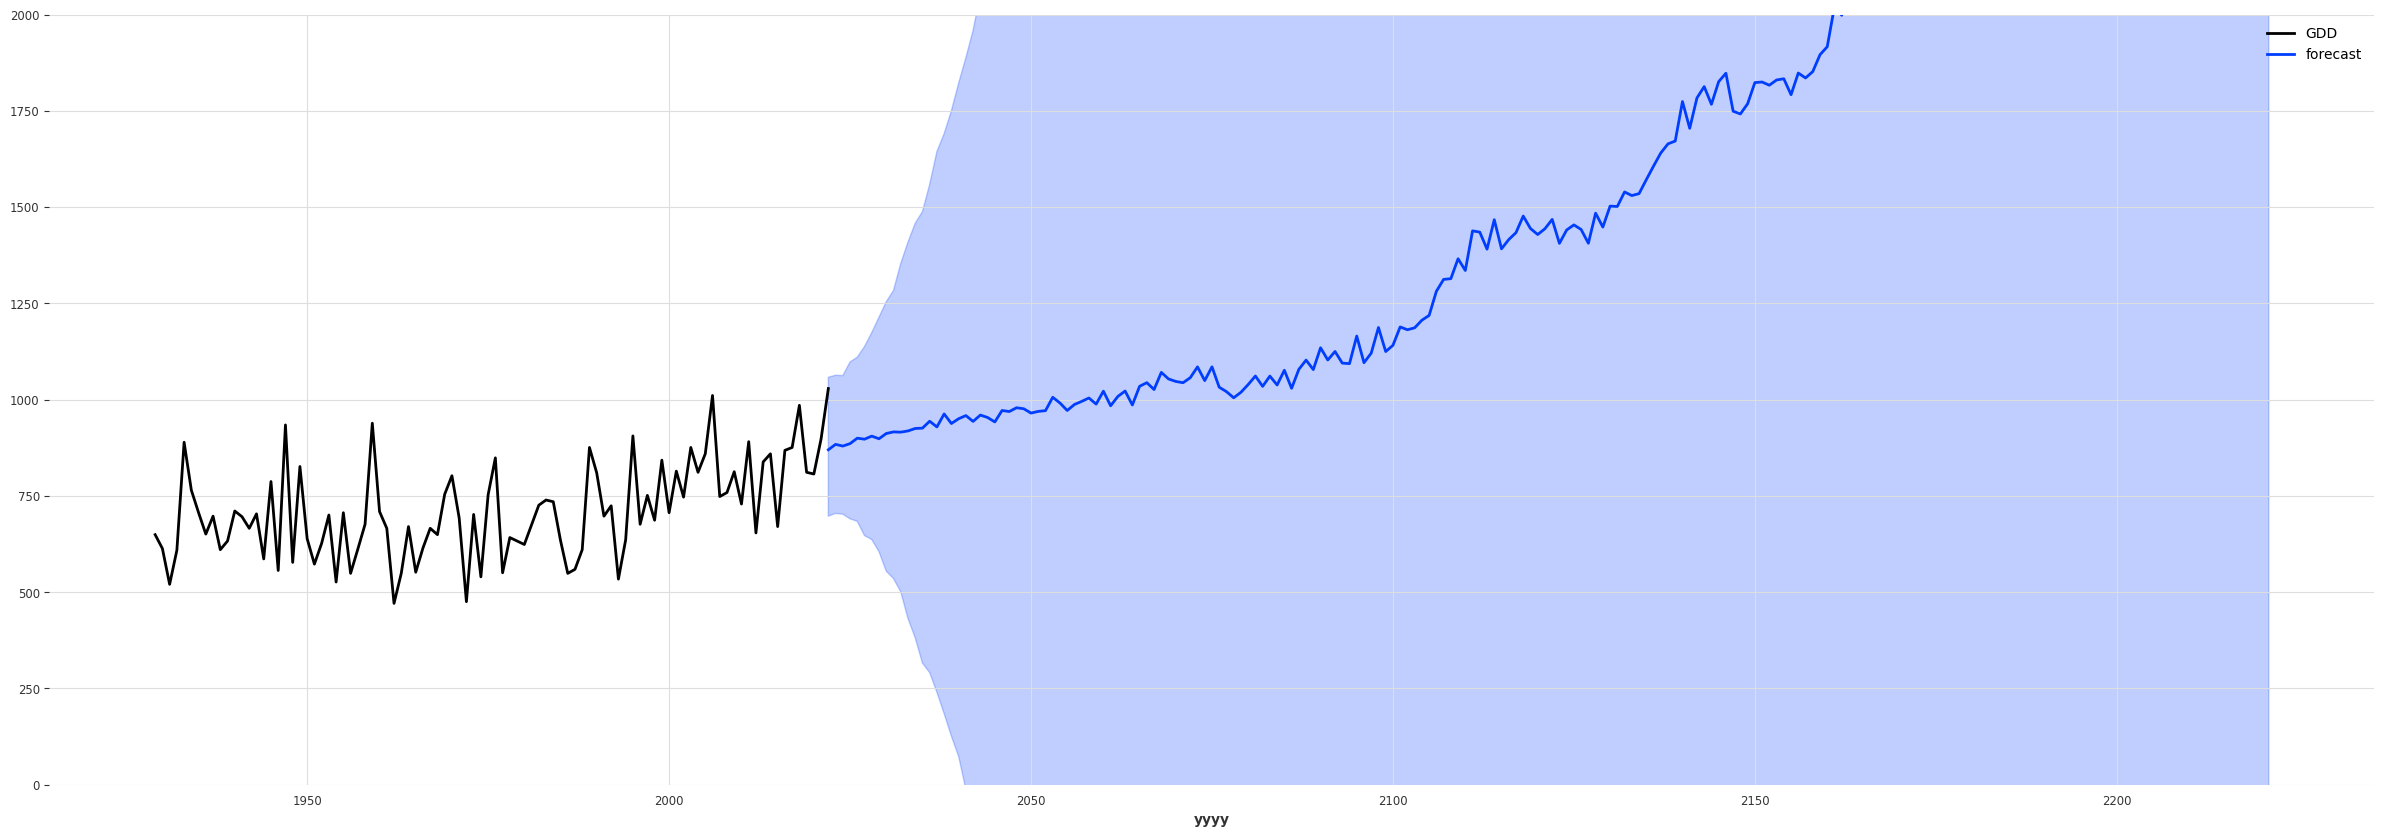

In [231]:
series_gdd.plot()
prediction_gdd.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylim(0, 2000)
plt.rcParams['figure.figsize'] = (30,10)

In [236]:
prediction_gdd[80].mean()

<TimeSeries (DataArray) (yyyy: 1, component: 1, sample: 1)>
array([[[1170.80944346]]])
Coordinates:
  * yyyy       (yyyy) int64 80
  * component  (component) object 'GDD'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [115]:
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print('model {} obtains MAE: {:.2f}'.format(model, mae(val, forecast)))
    print('model {} obtains MAPE: {:.2f}'.format(model, mape(val, forecast)))

In [169]:
eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAE: 104.71
model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 11.09
model (T)BATS obtains MAE: 88.49
model (T)BATS obtains MAPE: 9.23
model Auto-ARIMA obtains MAE: 106.87
model Auto-ARIMA obtains MAPE: 10.93


/Users/student/.pyenv/versions/3.10.6/envs/forward_farming/lib/python3.10/site-packages/darts/models/forecasting/theta.py:158: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self.seasonality.pd_series()[-self.season_period :],


model Theta(2) obtains MAE: 115.77
model Theta(2) obtains MAPE: 11.90


In [171]:
model = TBATS()
model.fit(train)
prediction_gdd = model.predict(200, num_samples=1000)

In [217]:
series_avg = TimeSeries.from_dataframe(df_agg, "period", "avgtemp(degC)")
train, val = series_avg[:-36], series_avg[-36:]
model_avg = ExponentialSmoothing(seasonal_periods = 12)
model_avg.fit(train)
prediction_avg = model_avg.predict(1200, num_samples=1000)

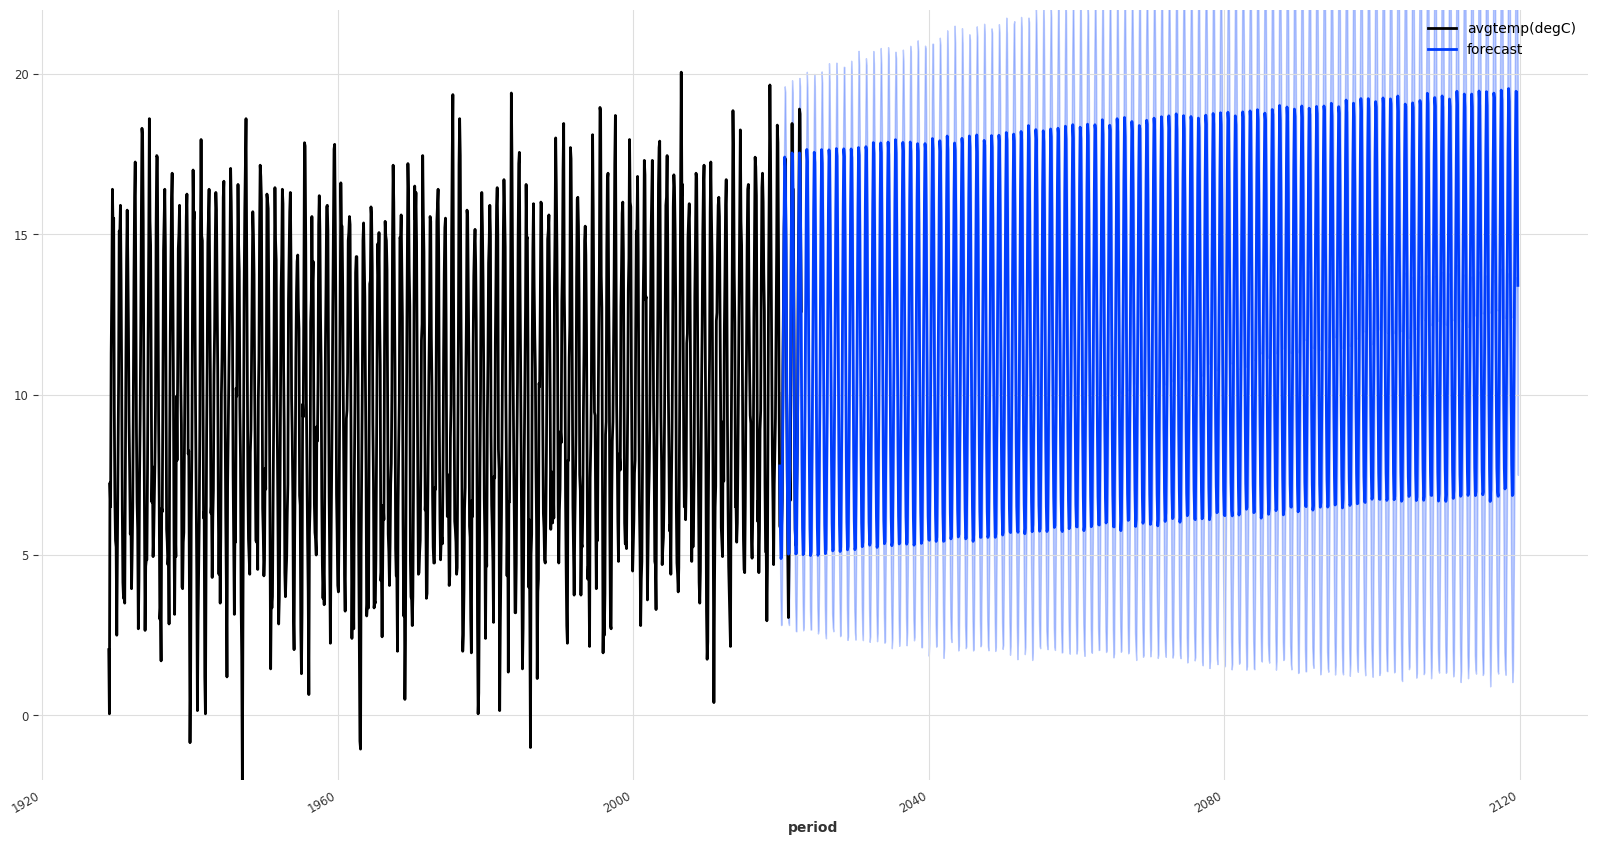

In [224]:
series_avg.plot()
prediction_avg.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylim(-2, 22)
plt.rcParams['figure.figsize'] = (30,10)

In [ ]:
series_avg_ann = TimeSeries.from_dataframe(data, "period", "avgtemp(degC)")
train, val = series_avg[:-36], series_avg[-36:]
model_avg = ExponentialSmoothing(seasonal_periods = 12)
model_avg.fit(train)
prediction_avg = model_avg.predict(1200, num_samples=1000)

In [227]:
df_min = data.groupby(by ='yyyy', as_index = False).min()

In [258]:
df_min.tail(20)

yyyy  Unnamed: 0   mm  tmax(degC)  tmin(degC)  af(days)  rain(mm)  \
74  2003        1440  Apr         6.6         0.0       0.0      14.0   
75  2004        1452  Apr         7.4         3.0       0.0      34.6   
76  2005        1464  Apr         6.7         2.1       0.0      17.5   
77  2006        1476  Apr         6.3         1.4       0.0       9.8   
78  2007        1488  Apr         7.2         2.4       0.0       5.8   
79  2008        1500  Apr         6.1         1.4       0.0      43.5   
80  2009        1512  Apr         5.2         1.3       0.0      26.8   
81  2010        1524  Apr         2.7        -1.9       0.0      18.8   
82  2011        1536  Apr         6.4         1.9       0.0      11.2   
83  2012        1548  Apr         7.0         2.3       0.0      26.2   
84  2013        1560  Apr         4.5        -0.2       0.0       9.2   
85  2014        1572  Apr         7.7         3.0       0.0       9.6   
86  2015        1584  Apr         6.9         2.0       0.0      21.4   
87  2016        1596  Apr         7.8         2.0       0.0      29.2   
88  2017        1608  Apr         6.7         2.2       0.0      15.8   
89  2018        1620  Apr         5.3         0.6       0.0      23.2   
90  2019        1632  Apr         6.6         2.8       0.0      16.2   
91  2020        1644  Apr         7.0         2.8       0.0       5.4   
92  2021        1656  Apr         5.2         0.9       0.0       5.6   
93  2022        1668  Apr         8.0         2.6       0.0      23.0   

    sun(hours)  avgtemp(degC)  GDD    period  
74        54.1           3.30  0.0  2003-Apr  
75        46.2           5.20  0.0  2004-Apr  
76        48.1           4.40  0.0  2005-Apr  
77        36.4           3.85  0.0  2006-Apr  
78        39.4           4.80  0.0  2007-Apr  
79        43.6           4.15  0.0  2008-Apr  
80        53.1           3.25  0.0  2009-Apr  
81        42.4           0.40  0.0  2010-Apr  
82        44.6           4.15  0.0  2011-Apr  
83        57.7           4.65  0.0  2012-Apr  
84        41.4           2.15  0.0  2013-Apr  
85        48.0           5.40  0.0  2014-Apr  
86        33.1           4.45  0.0  2015-Apr  
87        40.3           4.90  0.0  2016-Apr  
88        50.4           4.45  0.0  2017-Apr  
89        39.1           2.95  0.0  2018-Apr  
90        29.0           4.70  0.0  2019-Apr  
91        38.9           4.95  0.0  2020-Apr  
92        31.5           3.05  0.0  2021-Apr  
93        31.7           5.30  0.0  2022-Apr

In [266]:
series_min = TimeSeries.from_dataframe(df_min, "period", "tmin(degC)")
train, val = series_min[:-3], series_min[-3:]
model_min = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=SeasonalityMode.NONE)
model_min.fit(train)
prediction_min = model_min.predict(120, num_samples=1000)

In [267]:
eval_model(model_min)

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.NONE, seasonal_periods=0 obtains MAE: 1.02
model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.NONE, seasonal_periods=0 obtains MAPE: 51.18


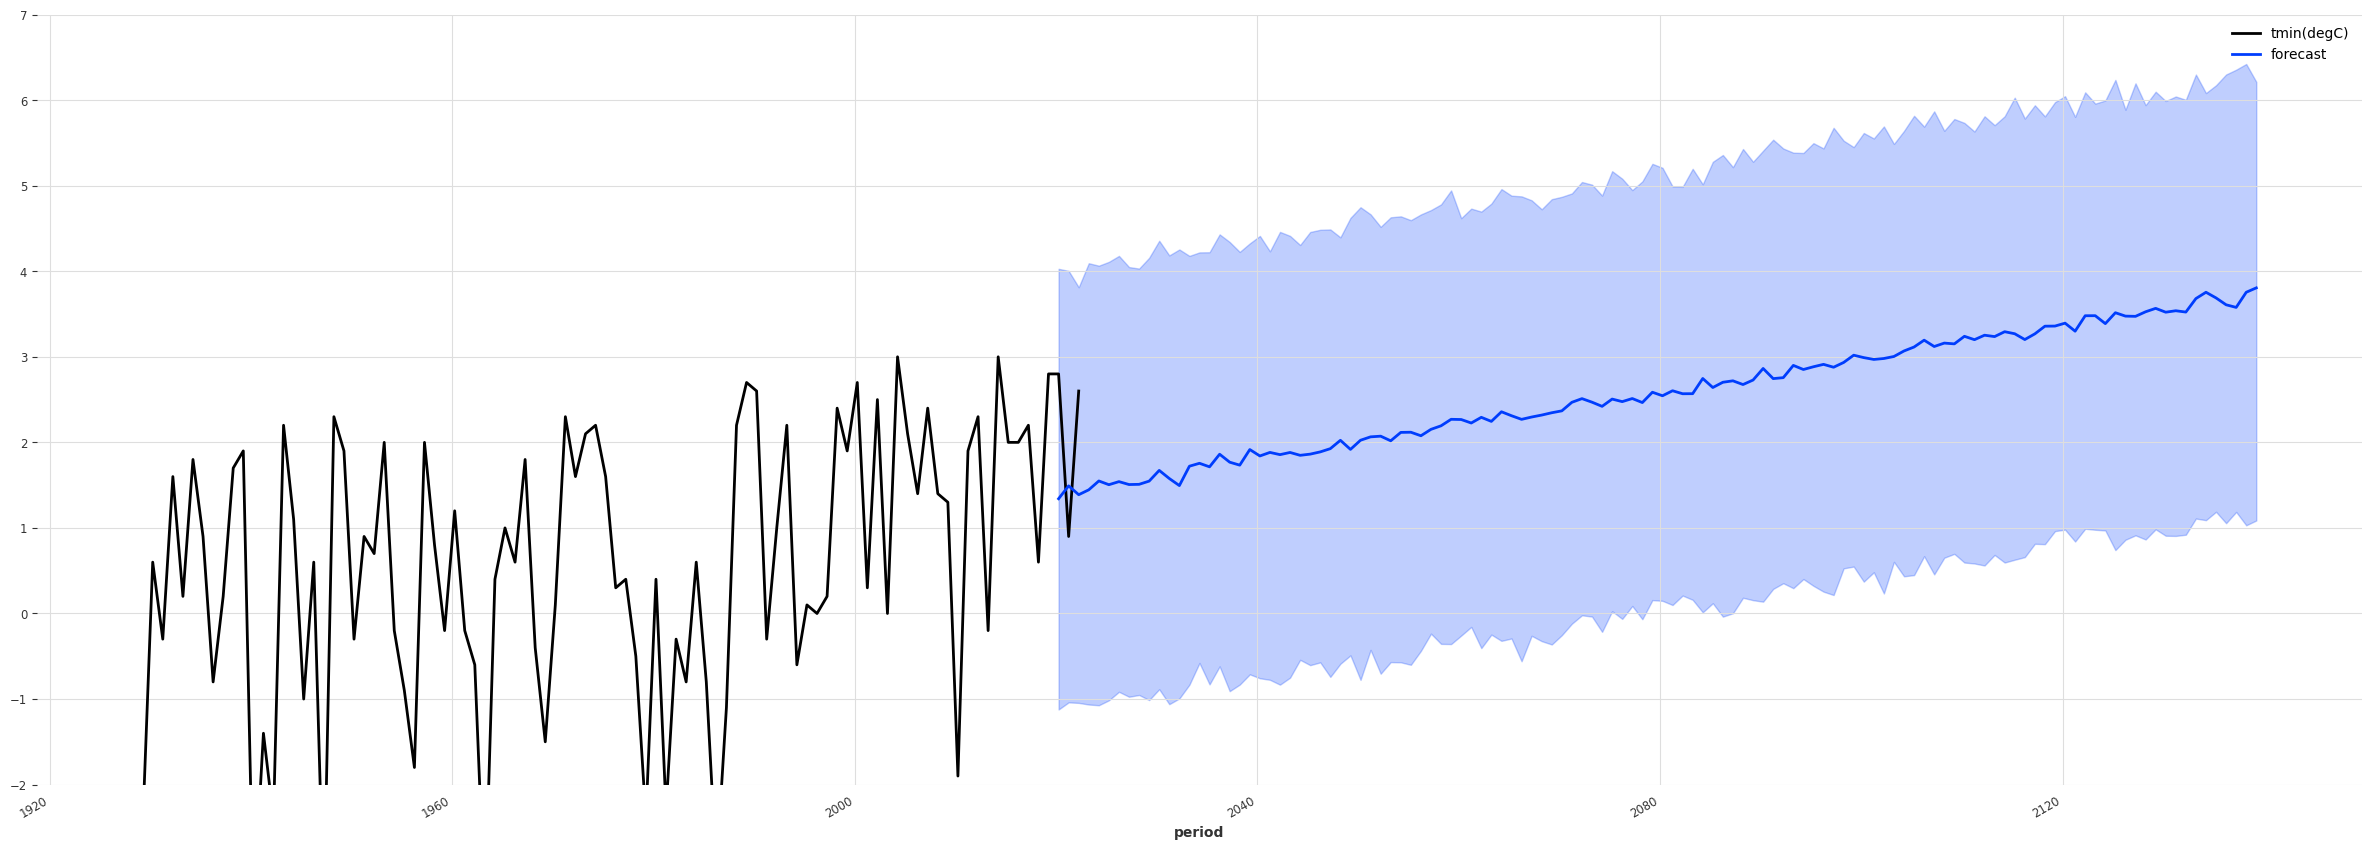

In [268]:
series_min.plot()
prediction_min.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylim(-2, 7)
plt.rcParams['figure.figsize'] = (30,10)

In [263]:
df_max = data.groupby(by ='yyyy', as_index = False).max()

In [264]:
df_max

yyyy  Unnamed: 0   mm  tmax(degC)  tmin(degC)  af(days)  rain(mm)  \
0   1929         563  Sep        20.9        11.9      17.0     186.2   
1   1930         575  Sep        19.9        11.9      12.0     149.4   
2   1931         587  Sep        19.2        12.3      17.0     145.2   
3   1932         599  Sep        21.0        13.5       8.0     170.7   
4   1933         611  Sep        23.0        13.6      13.0     128.0   
..   ...         ...  ...         ...         ...       ...       ...   
89  2018        1631  Sep        25.4        13.9      10.0     124.2   
90  2019        1643  Sep        22.7        14.1       5.0     200.0   
91  2020        1655  Sep        21.2        13.5       4.0     224.6   
92  2021        1667  Sep        22.8        14.1      12.0     145.2   
93  2022        1677  Sep        23.9        14.5       3.0     182.6   

    sun(hours)  avgtemp(degC)    GDD    period  
0        193.8          16.40  192.0  1929-Sep  
1        187.7          15.90  177.0  1930-Sep  
2        147.9          15.75  172.5  1931-Sep  
3        158.7          17.25  217.5  1932-Sep  
4        218.7          18.30  249.0  1933-Sep  
..         ...            ...    ...       ...  
89       252.3          19.65  289.5  2018-Sep  
90       184.1          18.40  252.0  2019-Sep  
91       251.9          17.35  220.5  2020-Sep  
92       196.8          18.45  253.5  2021-Sep  
93       233.4          18.90  267.0  2022-Sep  

[94 rows x 11 columns]

In [273]:
series_max = TimeSeries.from_dataframe(df_max, "period", "tmax(degC)")
train_max, val_max = series_max[:-3], series_max[-3:]
model_max = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=SeasonalityMode.NONE)
model_max.fit(train_max)
prediction_max = model_max.predict(120, num_samples=1000)

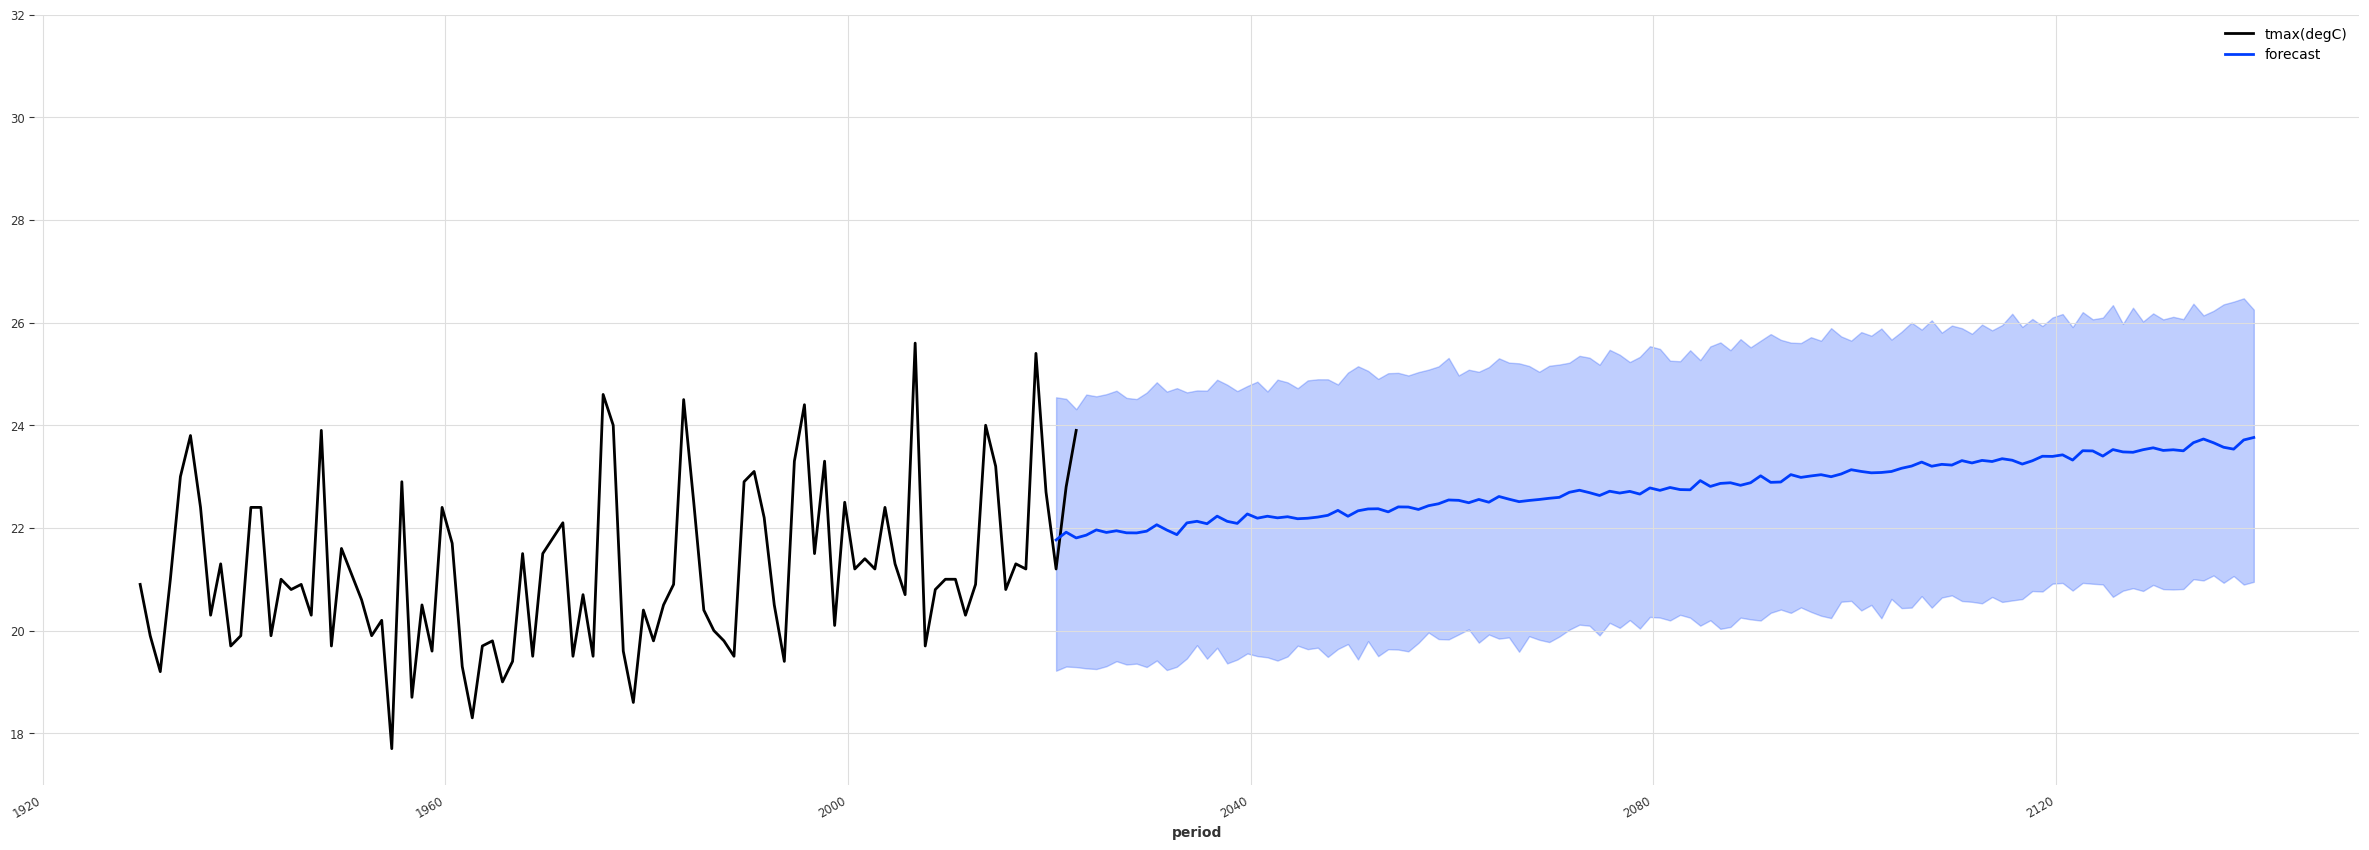

In [278]:
series_max.plot()
prediction_max.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylim(17, 32)
plt.rcParams['figure.figsize'] = (30,10)

In [438]:
series_max_full = TimeSeries.from_dataframe(data, "period", "tmax(degC)")
train_max_full, val_max_full = series_max_full[:-5], series_max_full[-5:]
model_max_full = ExponentialSmoothing(seasonal_periods = 12)
model_max_full.fit(train_max_full)
prediction_max_full = model_max_full.predict(1800, num_samples=1000)

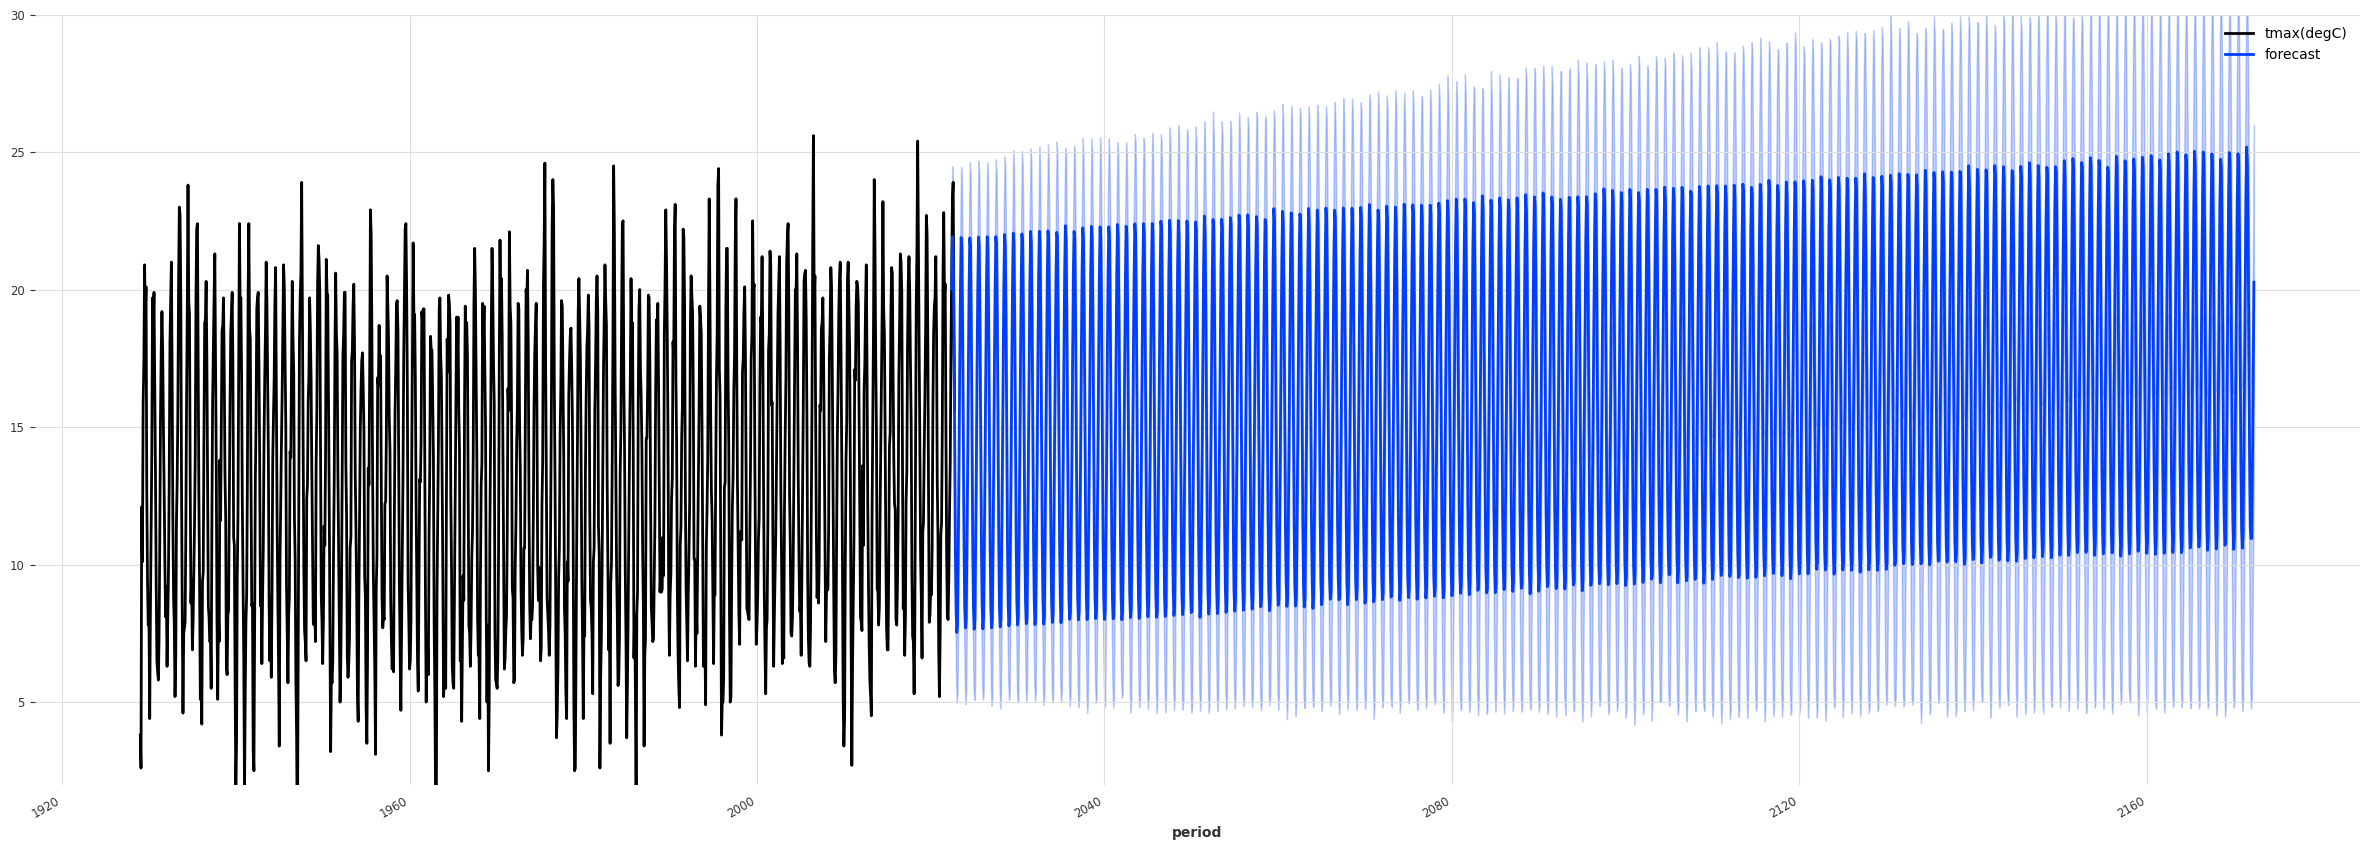

In [439]:
series_max_full.plot()
prediction_max_full.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylim(2, 30)
plt.rcParams['figure.figsize'] = (30,10)

In [440]:
series_min_full = TimeSeries.from_dataframe(data, "period", "tmin(degC)")
train_min_full, val_min_full = series_min_full[:-5], series_min_full[-5:]
model_min_full = ExponentialSmoothing(seasonal_periods = 12)
model_min_full.fit(train_min_full)
prediction_min_full = model_min_full.predict(1800, num_samples=1000)

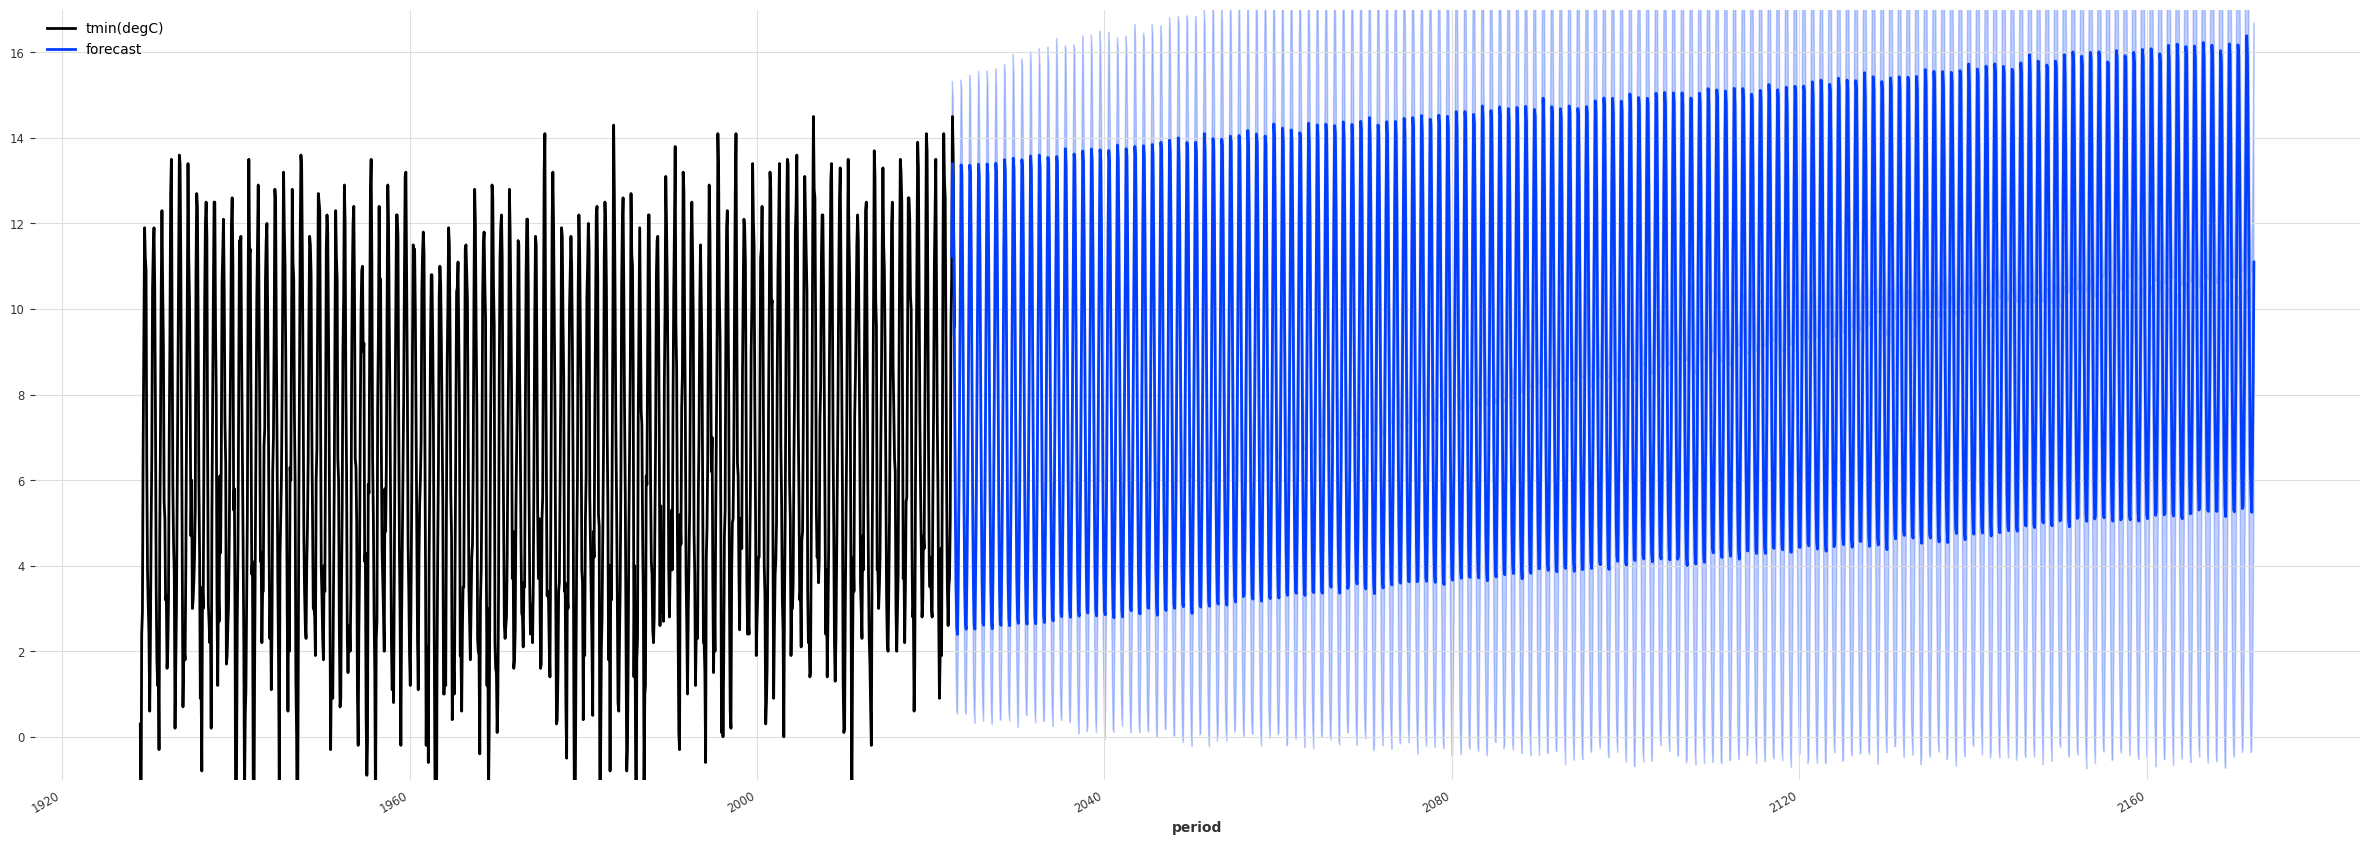

In [442]:
series_min_full.plot()
prediction_min_full.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylim(-1, 17)
plt.rcParams['figure.figsize'] = (30,10)

In [443]:
prediction_min_full[0].mean()

<TimeSeries (DataArray) (period: 1, component: 1, sample: 1)>
array([[[11.25607171]]])
Coordinates:
  * period     (period) datetime64[ns] 2022-06-01
  * component  (component) object 'tmin(degC)'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [444]:
min_list = []
[min_list.append(prediction_min_full[i].mean()[0].first_value()) for i in range(0,1800)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [446]:
len(min_list)

1800

In [449]:
max_list = []
[max_list.append(prediction_max_full[i].mean()[0].first_value()) for i in range(0,1800)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [450]:
len(max_list)

1800

In [354]:
abc.first_value()

20.042658742532527

In [451]:
gdd = []
arr = zip(min_list, max_list)
for z,t in arr:
    if (z+t)>=20:
        gdd.append((((z + t)/2)-10)*30)
    else:
        gdd.append(0)

In [452]:
gdd

[169.4809567561625,
 229.19580325678828,
 216.94524327153178,
 149.91029993868733,
 48.9413885315108,
 0,
 0,
 0,
 0,
 0,
 0,
 76.8073665862731,
 170.09796014975225,
 229.53799520384905,
 221.1145036108182,
 151.44521249565906,
 51.955040716245335,
 0,
 0,
 0,
 0,
 0,
 0,
 79.38321189845182,
 171.94585382594704,
 229.49293869614633,
 220.1093053080669,
 151.33001517276196,
 48.098852872886546,
 0,
 0,
 0,
 0,
 0,
 0,
 79.55870485749702,
 171.81360838742467,
 230.55910654694998,
 221.298978254451,
 153.1334797192252,
 49.76854408507119,
 0,
 0,
 0,
 0,
 0,
 0,
 79.63392188217775,
 171.9727121026637,
 229.532955803586,
 220.44282361490707,
 153.920901175666,
 51.47339181076822,
 0,
 0,
 0,
 0,
 0,
 0,
 83.01122702143121,
 173.51777858337374,
 229.89593655638026,
 219.30758882022818,
 152.7702214578919,
 50.329780258088945,
 0,
 0,
 0,
 0,
 0,
 0,
 81.53082565259152,
 173.52126261310642,
 231.9792384622949,
 222.49189942049227,
 154.43172074301003,
 51.13524685327679,
 0,
 0,
 0,
 0,
 0,


In [453]:
gdd_list = data['GDD'][:-5].tolist()

In [454]:
gdd_combined = gdd_list + gdd

In [455]:
len(gdd_combined)

2921

(0.0, 300.0)

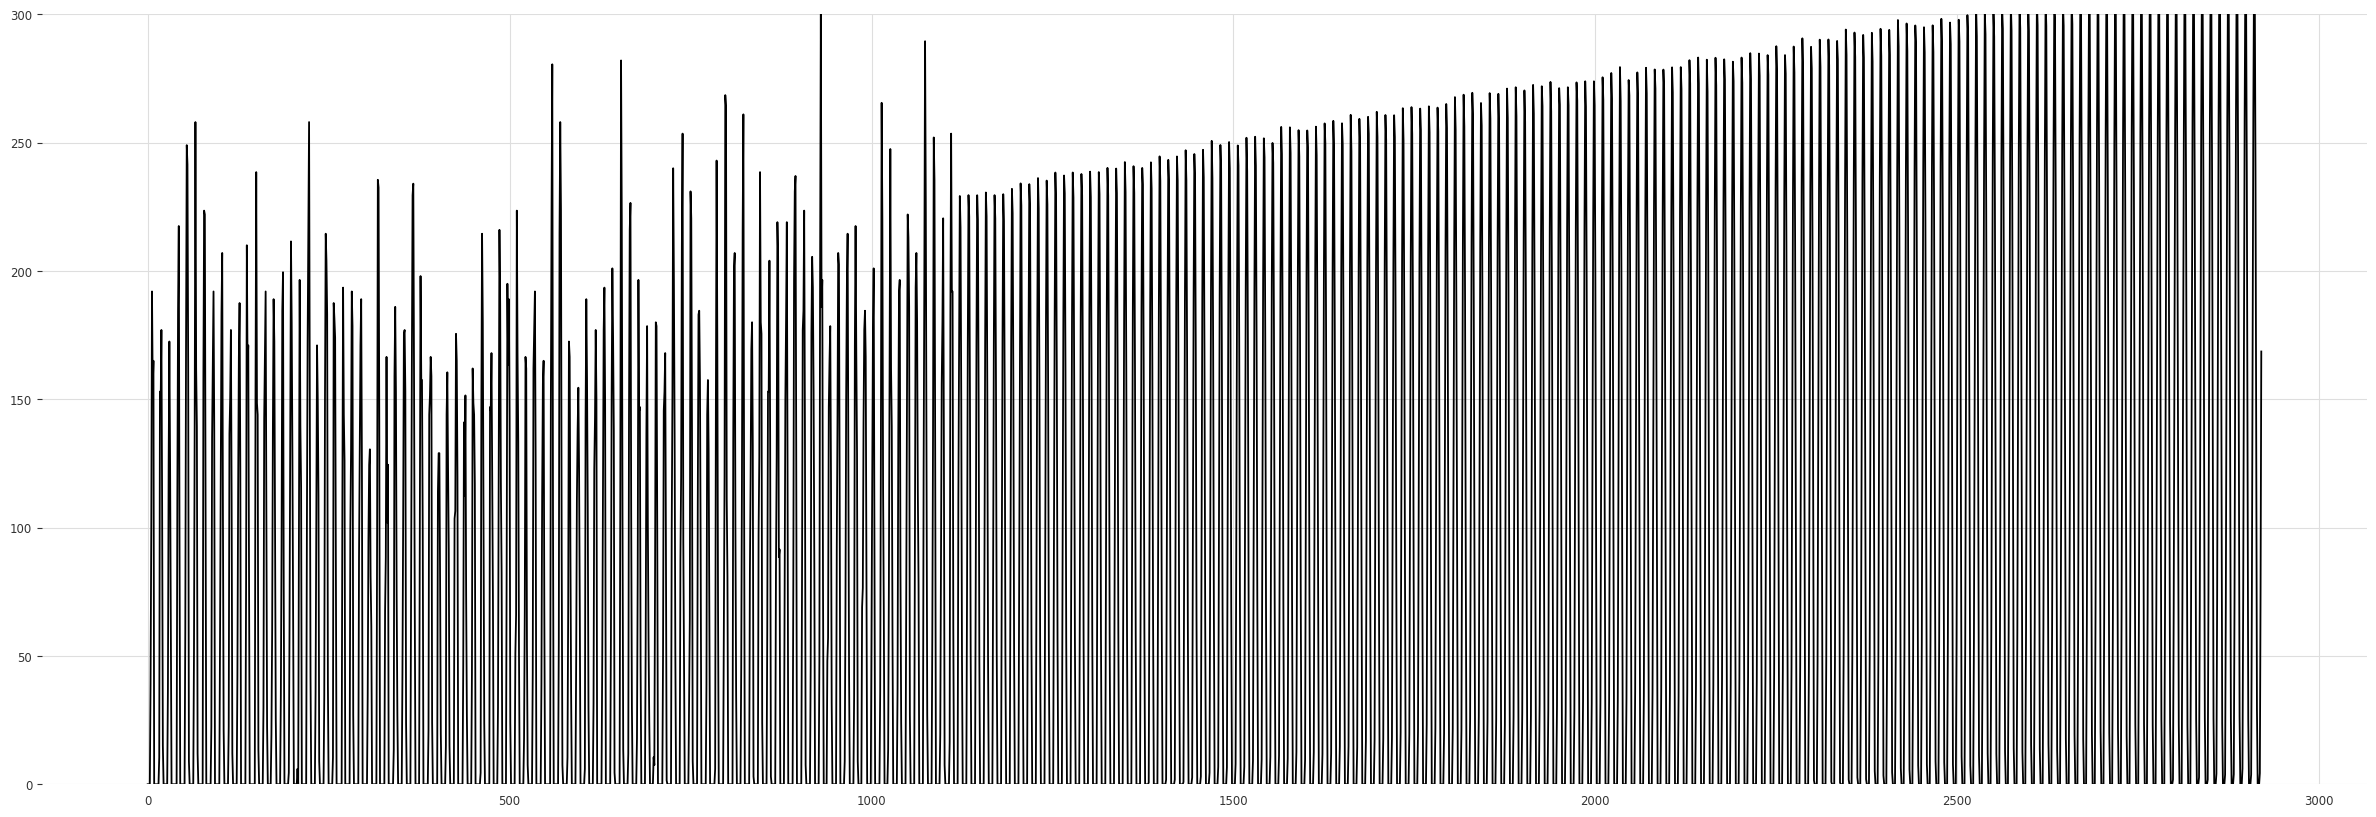

In [456]:
plt.plot(gdd_combined)
plt.ylim(0, 300)

In [458]:
gdd_janstart = gdd[7:]
len(gdd_janstart)

1793

In [459]:
gdd_twelves = gdd_janstart[:-5]

In [460]:
len(gdd_twelves)

1788

In [461]:
chunks = [gdd_twelves[x:x+12] for x in range(0, len(gdd_twelves), 12)]

In [464]:
np.array(chunks).shape

(149, 12)

In [463]:
gdd_preds = []

[gdd_preds.append(sum(i)) for i in chunks]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [466]:
len(gdd_preds)

149

In [471]:
gdd_real = df_agg['GDD'].tolist()

In [472]:
gdd_full = gdd_real + gdd_preds

In [475]:
len(gdd_full)

243

(400.0, 1700.0)

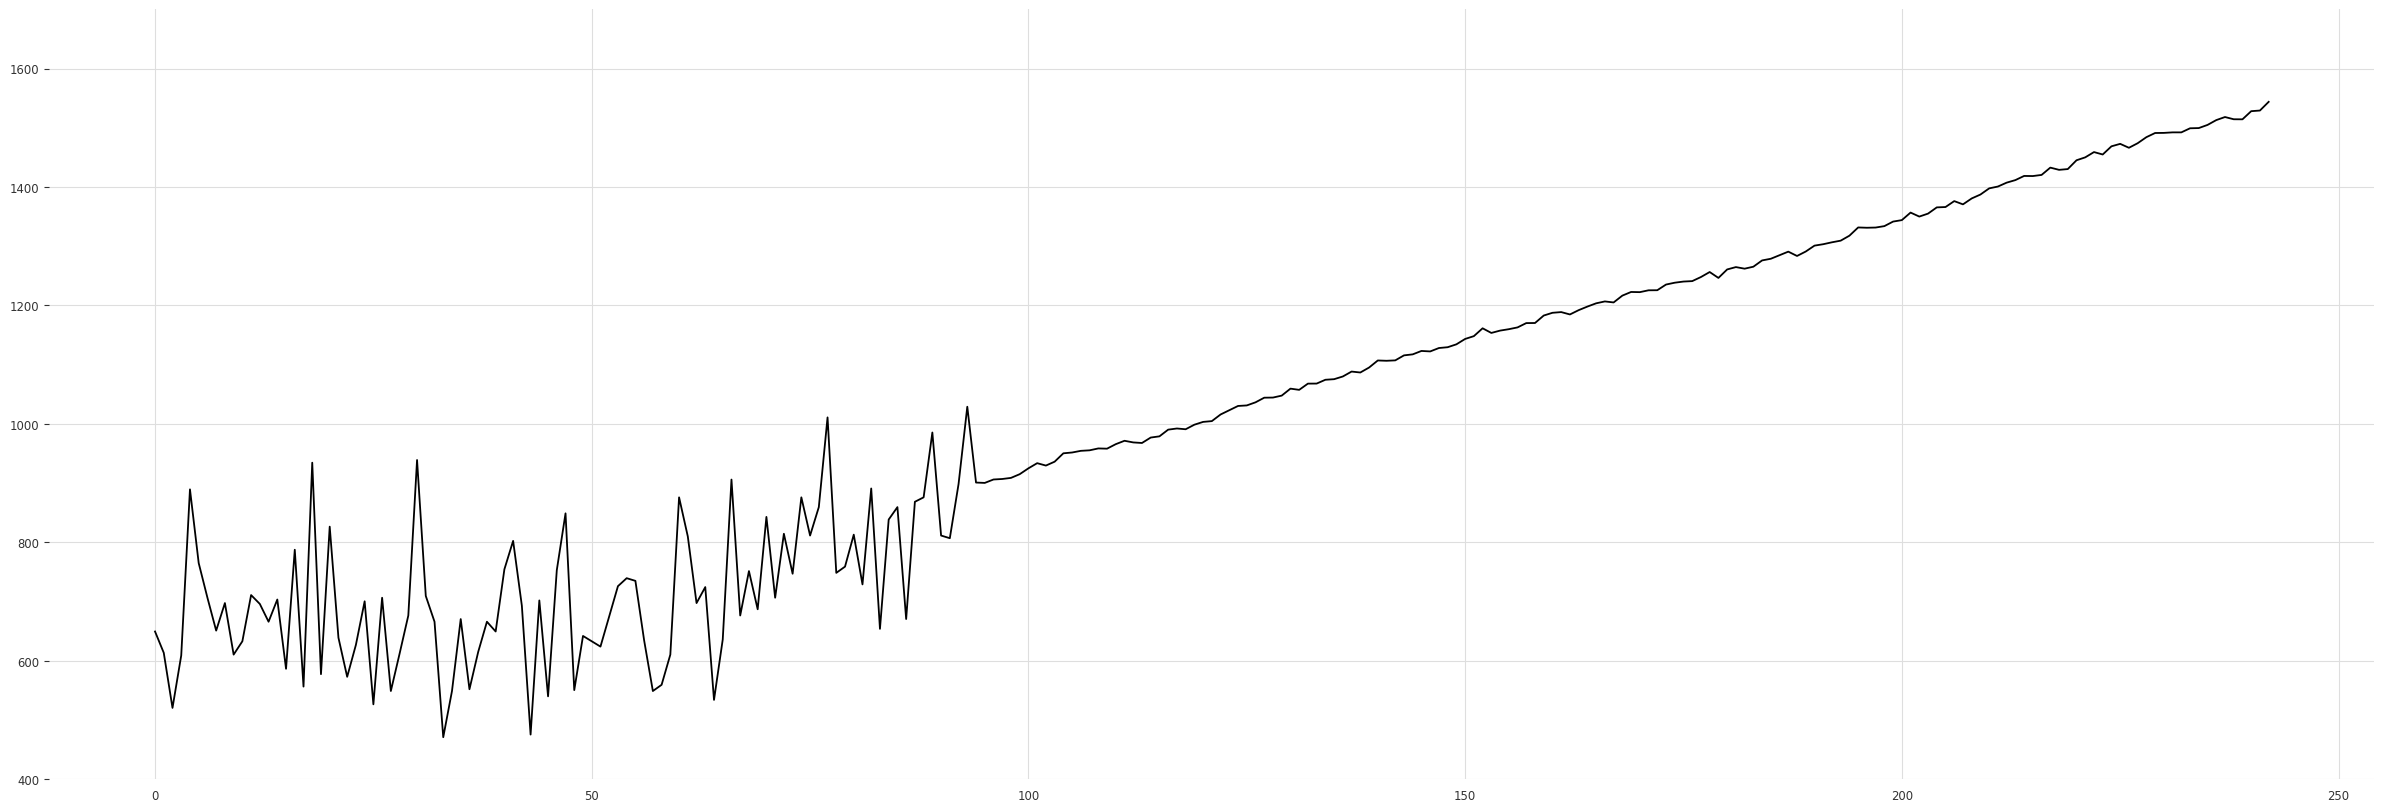

In [474]:
plt.plot(gdd_full)
plt.ylim(400, 1700)

In [481]:
year_list = []
[year_list.append(i) for i in range(1929, 2172)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [482]:
len(year_list)

243

In [499]:
list(gdd_arr)

[(649.5, 1929),
 (613.5, 1930),
 (520.5, 1931),
 (608.9999999999999, 1932),
 (889.5000000000001, 1933),
 (765.0000000000001, 1934),
 (706.4999999999999, 1935),
 (650.9999999999999, 1936),
 (697.5, 1937),
 (610.5, 1938),
 (633.0, 1939),
 (711.0, 1940),
 (696.0, 1941),
 (665.9999999999999, 1942),
 (703.5, 1943),
 (586.4999999999999, 1944),
 (787.4999999999999, 1945),
 (556.5, 1946),
 (934.5000000000001, 1947),
 (577.5, 1948),
 (826.5000000000001, 1949),
 (638.9999999999999, 1950),
 (573.0000000000001, 1951),
 (627.0, 1952),
 (700.5, 1953),
 (526.5, 1954),
 (706.5, 1955),
 (549.0, 1956),
 (612.0, 1957),
 (676.5, 1958),
 (938.9999999999999, 1959),
 (709.5, 1960),
 (666.0000000000001, 1961),
 (471.0000000000001, 1962),
 (549.0, 1963),
 (670.5, 1964),
 (552.0, 1965),
 (615.0, 1966),
 (666.0, 1967),
 (649.5, 1968),
 (754.5, 1969),
 (802.4999999999999, 1970),
 (693.0, 1971),
 (475.50000000000006, 1972),
 (701.9999999999999, 1973),
 (540.0, 1974),
 (753.0, 1975),
 (849.0, 1976),
 (550.5, 1977),

In [509]:
fig = px.line(x=year_list, y=gdd_full, title='GDD by year')

In [510]:
fig.show()